Student Details

Name:

ID:

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

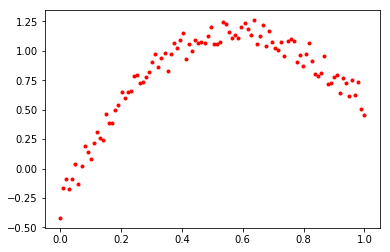

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 1
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [3]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [4]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [5]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [6]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

## TASK4

### 4.1

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [7]:
ein=[]
eout=[]
weights=[]
lambdas = np.arange(0,1, 0.001)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


C:\Users\tienial1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
optim_lambda=lambdas[eout.index(np.min(eout))]
print("Minimum Eout=%f is obtained for the optimal value lambda=%f" %(np.min(eout),optim_lambda))
print("With no regularization eout=%f" %eout[0])

Minimum Eout=0.071466 is obtained for the optimal value lambda=0.021000
With no regularization eout=3.502730


### 4.2

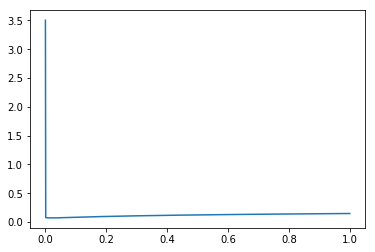

In [9]:
plt.figure()
plt.plot(lambdas, eout)
plt.show()


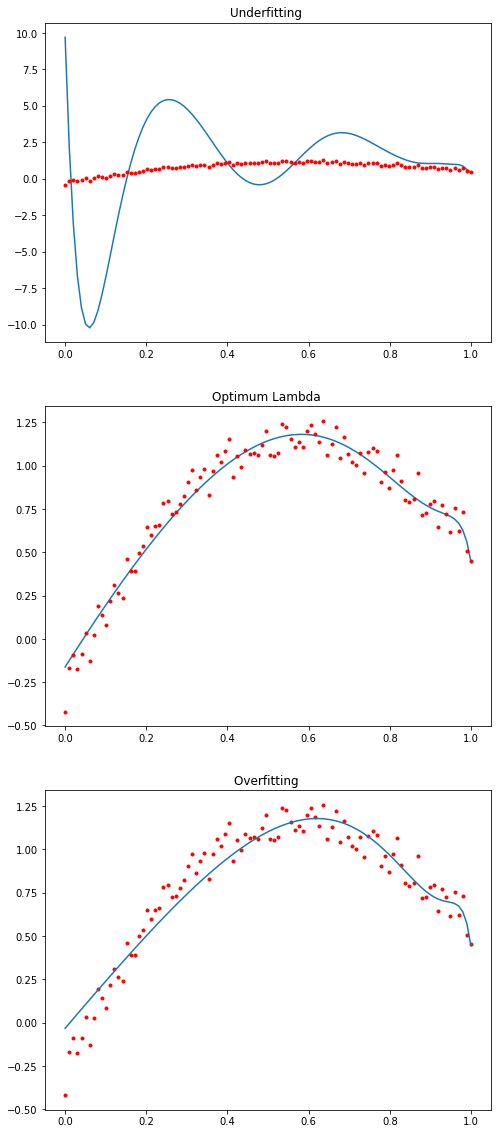

In [10]:
w_underfit = weights_reg(X_train,y_train,0)
pred_underfit=lin_reg(w_underfit,X_trans)
w_optim = weights_reg(X_train,y_train,optim_lambda)
pred_optim=lin_reg(w_optim,X_trans)
w_overfit = weights_reg(X_train,y_train,0.1)
pred_overfit=lin_reg(w_overfit,X_trans)

plt.figure(figsize=(8, 20)) 

plt.subplot(3,1,1)
plt.title('Underfitting ')
plt.plot(X,pred_underfit)
plt.plot(X,y,"r.")
plt.subplot(3,1,2)
plt.title('Optimum Lambda ')
plt.plot(X,pred_optim)
plt.plot(X,y,"r.")
plt.subplot(3,1,3)
plt.title('Overfitting ' )
plt.plot(X,y,"r.")
plt.plot(X,pred_overfit)

plt.show()

## TASK5

In [11]:
eins=[]
eouts=[]
weightss=[]

# cv is a k-fold cross-valiatidation object
kf = KFold(n_splits=10,random_state=5, shuffle=True)

for l in lambdas:
    ein=[]
    eout=[]
    weights=[]
    for train_index, test_index in kf.split(X_trans):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]
        w = weights_reg(X_train,y_train,l)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
        weights.append(w)
    eins.append(np.mean(ein))
    eouts.append(np.mean(eout))
    weightss.append(np.mean(weights))

In [12]:
optim_lambda=lambdas[eouts.index(np.min(eouts))]
print("Minimum Eout=%f is obtained for the optimal value lambda=%f" %(np.min(eouts),optim_lambda))
print("With no regularization eout=%f" %eouts[0])

Minimum Eout=0.074581 is obtained for the optimal value lambda=0.003000
With no regularization eout=4.441022


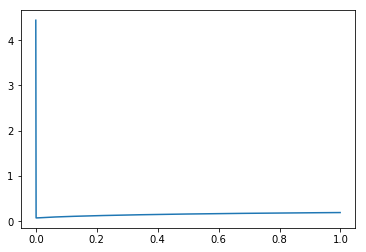

In [13]:
plt.figure()
plt.plot(lambdas, eouts)
plt.show()


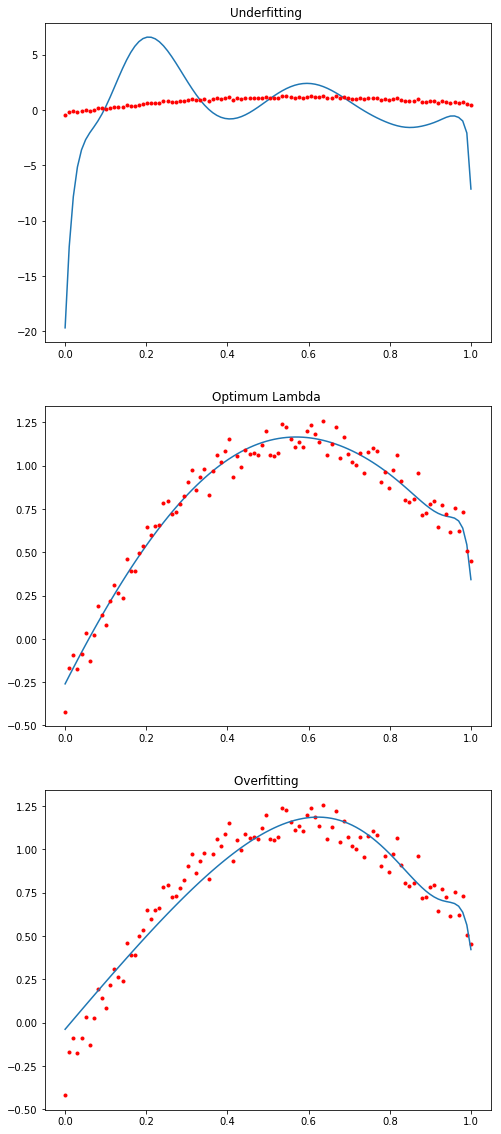

In [14]:
w_underfit = weights_reg(X_train,y_train,0)
pred_underfit=lin_reg(w_underfit,X_trans)
w_optim = weights_reg(X_train,y_train,optim_lambda)
pred_optim=lin_reg(w_optim,X_trans)
w_overfit = weights_reg(X_train,y_train,0.1)
pred_overfit=lin_reg(w_overfit,X_trans)

plt.figure(figsize=(8, 20)) 

plt.subplot(3,1,1)
plt.title('Underfitting ')
plt.plot(X,pred_underfit)
plt.plot(X,y,"r.")
plt.subplot(3,1,2)
plt.title('Optimum Lambda ')
plt.plot(X,pred_optim)
plt.plot(X,y,"r.")
plt.subplot(3,1,3)
plt.title('Overfitting ' )
plt.plot(X,y,"r.")
plt.plot(X,pred_overfit)

plt.show()

## TASK6

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
Ridge_reg   = RidgeCV(alphas=np.arange(0.001,1, 0.001)).fit(X_trans, y)
Lasso_reg   = LassoCV(alphas=np.arange(0.001,1, 0.001),random_state=5).fit(X_trans, y)
preds_Ridge = Ridge_reg.predict(X_test)
preds_Lasso = Lasso_reg.predict(X_test)
eout_Ridge  = math.sqrt((preds_Ridge-np.array(y_test)).dot(preds_Ridge-np.array(y_test))/len(X_test))
eout_Lasso  = math.sqrt((preds_Lasso-np.array(y_test)).dot(preds_Lasso-np.array(y_test))/len(X_test))

C:\Users\tienial1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tienial1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\tienial1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\tienial1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear

In [16]:
print("Optimum Lambda for RidgeCV:%f with an estimated Eout=%f" %(Ridge_reg.alpha_,eout_Ridge))
print("Optimum Lambda for LassoCV:%f with an estimated Eout=%f" %(Lasso_reg.alpha_,eout_Lasso))

#print(reg.alphas,reg.alpha_)


Optimum Lambda for RidgeCV:0.002000 with an estimated Eout=0.072569
Optimum Lambda for LassoCV:0.001000 with an estimated Eout=0.072313


Both RidgeCV and LassoCV conclude with the same optimum Lambda=0.001 which is the same result we obtained with KFOLD Cross Validation. LassoCV is getting better Eout of 0.007 compared with RidgCV. However our Cross validation has got a better Eout of 0.069. We conclude that our proper cv methods obtained the correct optimum lambda as the result is similar to RidgeCV and LassoCV.

In [17]:
print("RidgeCV weights:")
print(Ridge_reg.coef_)
print("LassoCV weights:")
print(Lasso_reg.coef_)

RidgeCV weights:
[ 0.00000000e+00  4.72486133e+00 -2.99188799e+00 -1.75245068e+00
 -2.04949641e-01  4.48025872e-01  5.20211669e-01  3.63053847e-01
  1.66120302e-01  4.67853113e-03 -1.02926465e-01 -1.61343686e-01
 -1.82009560e-01 -1.76507255e-01 -1.54385412e-01 -1.22822918e-01
 -8.69395478e-02 -5.02518270e-02 -1.50917493e-02  1.70603677e-02
  4.53275761e-02  6.92564525e-02  8.86883698e-02  1.03667532e-01
  1.14375060e-01  1.21081511e-01  1.24112536e-01  1.23823998e-01
  1.20584024e-01  1.14760153e-01  1.06710320e-01  9.67766972e-02
  8.52817064e-02  7.25256433e-02  5.87855141e-02  4.43147584e-02
  2.93436130e-02  1.40799230e-02 -1.28974626e-03 -1.65988090e-02
 -3.16992578e-02 -4.64602225e-02 -6.07665374e-02 -7.45173484e-02
 -8.76247830e-02 -1.00012697e-01 -1.11615507e-01 -1.22377111e-01
 -1.32249901e-01 -1.41193855e-01 -1.49175728e-01]
LassoCV weights:
[ 0.          3.24491015 -0.33331423 -2.53905672 -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.02

As expected Lasso is more restrictive than Ridge, indeed Lasso finished with really less paramters than Ridge.